In [3]:
import os
import pandas as pd
import sys
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

In [4]:
DATASET_PATH = 'DATA/'
FILE = 'dataset.csv'

data_path = os.path.join(DATASET_PATH, FILE)
diabetes = pd.read_csv(data_path)

diabetes.head()
df = pd.DataFrame(diabetes)
print (df)

        SEQN  BMXWT   BMXHT  BMXBMI  BMXWAIST  BPQ020  RIDAGEYR  RIDRETH3  \
0      73559   88.9  175.30    28.9     109.2       1        72         3   
1      73564   93.4  161.80    35.7     110.8       1        61         3   
2      73568   47.1  152.50    20.3      73.7       2        26         3   
3      73574   56.8  158.00    22.8      78.7       2        33         6   
4      73577   79.7  166.20    28.9     100.0       2        32         1   
5      73580   93.5  161.40    35.9     107.4       2        38         4   
6      73581   80.9  185.00    23.6      99.3       2        50         6   
7      73596  104.0  164.70    38.3     117.8       1        57         6   
8      73598   86.7  165.00    31.8      98.6       2        20         1   
9      73600  126.2  185.10    36.8     122.9       1        37         4   
10     73607  111.9  169.60    38.9     130.5       1        75         3   
11     73610   90.2  176.80    28.9     102.6       2        43         3   

              SEQN     BMXWT     BMXHT    BMXBMI  BMXWAIST    BPQ020  \
SEQN      1.000000  0.076881 -0.043852  0.104891  0.151501 -0.135231   
BMXWT     0.076881  1.000000  0.440439  0.885301  0.898831 -0.189043   
BMXHT    -0.043852  0.440439  1.000000 -0.013342  0.180268  0.024691   
BMXBMI    0.104891  0.885301 -0.013342  1.000000  0.908047 -0.219810   
BMXWAIST  0.151501  0.898831  0.180268  0.908047  1.000000 -0.287706   
BPQ020   -0.135231 -0.189043  0.024691 -0.219810 -0.287706  1.000000   
RIDAGEYR  0.191263 -0.028058 -0.134795  0.035357  0.192056 -0.437986   
RIDRETH3  0.028472 -0.077518  0.091970 -0.141084 -0.132537 -0.021852   
MCQ300C  -0.059780 -0.136606  0.029261 -0.168173 -0.158664  0.088581   
PAQ665    0.048937  0.054558 -0.043861  0.083051  0.113196 -0.073746   
LBXTC    -0.067215 -0.038006 -0.072234 -0.010527 -0.024833  0.058770   
OUTCOME   0.443592  0.189519 -0.016966  0.215919  0.304822 -0.317902   

          RIDAGEYR  RIDRETH3   MCQ300C    PAQ665     LBXTC   OU

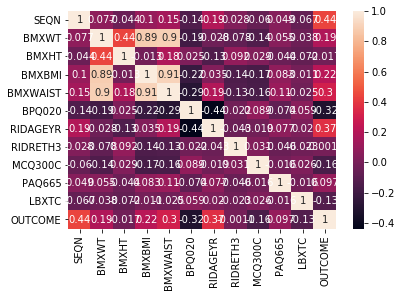

In [5]:
corrMatrix = df.corr()
print (corrMatrix)

sns.heatmap(corrMatrix, annot=True)
plt.show()



In [6]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.loc[:, diabetes.columns != 'OUTCOME'], diabetes['OUTCOME'], stratify=diabetes['OUTCOME'], random_state=42)


c:\python27\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\python27\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


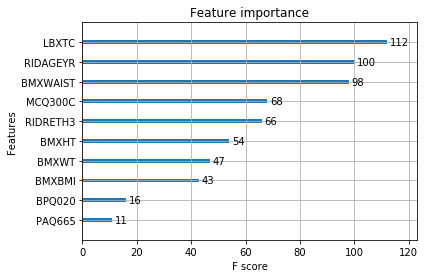

In [7]:
# plot feature importance manually
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot

# split data into X and y
X = df[['BMXWT', 'BMXHT', 'BMXBMI', 'BMXWAIST', 'BPQ020', 'RIDAGEYR', 'RIDRETH3', 'MCQ300C', 'PAQ665', 'LBXTC']]
y = df[['OUTCOME']]
# fit model no training data
model = XGBClassifier()
model.fit(X, y)
# plot feature importance
plot_importance(model)
pyplot.show()

In [8]:
from sklearn.tree import DecisionTreeClassifier

X = df[['BMXWT', 'BMXHT', 'BMXBMI', 'BMXWAIST', 'BPQ020', 'RIDAGEYR', 'RIDRETH3', 'MCQ300C', 'PAQ665', 'LBXTC']]
y = df[['OUTCOME']]


dtree=DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features="auto")
dtree.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [9]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())

# Create PDF
graph.write_pdf("decision_tree_v4.pdf")

# Create PNG
graph.write_png("decision_tree_v4.png")

True

In [10]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [11]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.loc[:, diabetes.columns != 'OUTCOME'], diabetes['OUTCOME'], stratify=diabetes['OUTCOME'], random_state = 12)

In [12]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

c:\python27\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [16]:
learning_rate_list = [0.15,0.1,0.05,0.01,0.005,0.001]

for learning_rate in learning_rate_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))

('Learning rate: ', 0.15)
Accuracy score (training): 0.855
Accuracy score (validation): 0.848
('Learning rate: ', 0.1)
Accuracy score (training): 0.846
Accuracy score (validation): 0.842
('Learning rate: ', 0.05)
Accuracy score (training): 0.814
Accuracy score (validation): 0.812
('Learning rate: ', 0.01)
Accuracy score (training): 0.709
Accuracy score (validation): 0.709
('Learning rate: ', 0.005)
Accuracy score (training): 0.709
Accuracy score (validation): 0.709
('Learning rate: ', 0.001)
Accuracy score (training): 0.709
Accuracy score (validation): 0.709


In [26]:
max_depth_list = [2,3,4,5,6,7]

for max_depth in max_depth_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.15, max_features=2, max_depth=max_depth, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Max depth: ", max_depth)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))

('Max depth: ', 2)
Accuracy score (training): 0.855
Accuracy score (validation): 0.848
('Max depth: ', 3)
Accuracy score (training): 0.858
Accuracy score (validation): 0.852
('Max depth: ', 4)
Accuracy score (training): 0.867
Accuracy score (validation): 0.854
('Max depth: ', 5)
Accuracy score (training): 0.880
Accuracy score (validation): 0.852
('Max depth: ', 6)
Accuracy score (training): 0.893
Accuracy score (validation): 0.852
('Max depth: ', 7)
Accuracy score (training): 0.922
Accuracy score (validation): 0.853


In [31]:
n_estimators_list = [100,250,500,750,1000,1250,1500,1750]

for n_estimators in n_estimators_list:
    gb_clf = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=0.15, max_features=2, max_depth=4, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("N estimators: ", n_estimators)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))

('N estimators: ', 100)
Accuracy score (training): 0.913
Accuracy score (validation): 0.844
('N estimators: ', 250)
Accuracy score (training): 0.962
Accuracy score (validation): 0.842
('N estimators: ', 500)
Accuracy score (training): 0.997
Accuracy score (validation): 0.840
('N estimators: ', 750)
Accuracy score (training): 1.000
Accuracy score (validation): 0.836
('N estimators: ', 1000)
Accuracy score (training): 1.000
Accuracy score (validation): 0.838
('N estimators: ', 1250)
Accuracy score (training): 1.000
Accuracy score (validation): 0.836
('N estimators: ', 1500)
Accuracy score (training): 1.000
Accuracy score (validation): 0.833
('N estimators: ', 1750)
Accuracy score (training): 1.000
Accuracy score (validation): 0.837


In [32]:
gb_clf2 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.15, max_features=2, max_depth=4, random_state=0)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[895  57]
 [152 238]]
Classification Report
              precision    recall  f1-score   support

           0       0.85      0.94      0.90       952
           1       0.81      0.61      0.69       390

   micro avg       0.84      0.84      0.84      1342
   macro avg       0.83      0.78      0.80      1342
weighted avg       0.84      0.84      0.84      1342



In [33]:
from xgboost import XGBClassifier


In [34]:
xgb_clf = XGBClassifier(learning_rate =0.15, max_depth=4, n_estimators=100)
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.15, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [35]:
score = xgb_clf.score(X_test, y_test)
print(score)

0.8502235469448585
